# GEOSERVER

Este exemplo pretende ilustrar como converter os objectos JSON disponíveis através de https://geoserver.cm-maia.pt/geoserver/web/ para formato geoJSON.
Independentemente de se poderem utilizar esses dados, a questão é que os dados *não estão a ser disponibilizados* em geoJSON (cf.  https://datatracker.ietf.org/doc/html/rfc7946, pág. 12).

In [1]:
!pip install pyproj

In [2]:
import requests
import json

In [3]:
url="https://geoserver.cm-maia.pt/geoserver/amp/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=amp:ugsSaude&maxFeatures=5000&outputFormat=application%2Fjson "
 
UnidadesDeSaude = json.loads(requests.get(url).text)
print (UnidadesDeSaude.keys())
print (UnidadesDeSaude['features'][0:2])     # Imprimimos os dois primeiros pontos só para confirmar que as coordenadas não estão em EPSG:4326.

dict_keys(['type', 'totalFeatures', 'features', 'crs'])
[{'type': 'Feature', 'id': 'ugsSaude.fid--64a653e5_19097246611_-464c', 'geometry': {'type': 'Point', 'coordinates': [-36882.80050255, 171612.5387203]}, 'geometry_name': 'the_geom', 'properties': {'id': 1, 'designacao': 'Unidade de Saúde Familiar Alto da Maia', 'tipo': 'Centro de Saúde', 'codpostal': '4425-147', 'morada': 'Rua Nova da Corga - Lugar Moutidos', 'freguesia': 'AGUAS SANTAS', 'localidade': 'Águas Santas', 'concelho': 'Maia', 'email': 'admsede@csaguassantas.min-saude.pt', 'telefone': '229774110', 'web_site': None, 'natureza': 'Pública', 'valencia': None, 'observacao': None}}, {'type': 'Feature', 'id': 'ugsSaude.fid--64a653e5_19097246611_-464b', 'geometry': {'type': 'Point', 'coordinates': [-40410.80837209, 172722.58396319]}, 'geometry_name': 'the_geom', 'properties': {'id': 2, 'designacao': 'Esferasaúde Maia', 'tipo': 'Unidade de Saúde', 'codpostal': '4470 - 147', 'morada': 'Rua Augusto Simões, 207', 'freguesia': 'CIDADE

In [4]:
url2= 'https://baze.cm-maia.pt/BaZe/api/api4gj.php?nome=LimConcVM'

text=requests.get(url2).text
print("BOM - Byte order mark", ord(text[0]))
LimConcelho = json.loads(requests.get(url2).text[1:])      # stripping do BOM
print(LimConcelho.keys())
#print(LimConcelho['features'])

BOM - Byte order mark 65279
dict_keys(['type', 'features'])


In [5]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:3763", "EPSG:4326")

USaude=json.loads(json.dumps(UnidadesDeSaude))                    # copio os dados para outra variável para poder editar (mantendo o original)
for cs in USaude['features']:
    w= transformer.transform(cs['geometry']['coordinates'][0], cs['geometry']['coordinates'][1])
    #print(w)                        
    
    cs['geometry']['coordinates'][0]=w[1]                     # Além do sistema de cooridenadas ser diferente, a Lat / Lng estão 'trocadas'
    cs['geometry']['coordinates'][1]=w[0]


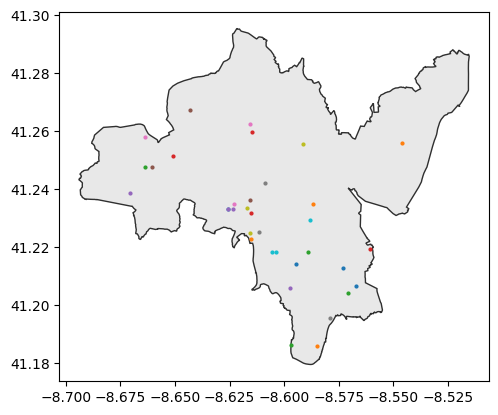

In [6]:
import matplotlib.pyplot as plt
from descartes import PolygonPatch

flat = 111319  # factor 1 degree Latitude - kms
flng = 83720   # factor 1 degree Longitude - kms (for Maia's latitude)

fig = plt.figure()
ax = fig.gca()

for p in USaude['features']:
    plt.plot([p['geometry']['coordinates'][0]], [p['geometry']['coordinates'][1]], marker='o', markersize='2')

LimConc2Des = {"type":"Polygon","coordinates":[LimConcelho['features'][0]['geometry']['coordinates']]}
ax.add_patch(PolygonPatch(LimConc2Des, fc=[.9,.9,.9], ec=[.1,.1,.1], alpha=0.9, zorder=1 ))

ax.axis('scaled')
ax.set_aspect(flat/flng)

plt.show()

## Para visualizar os dados em geojson.io

In [7]:
import urllib.parse
safe_string = urllib.parse.quote_plus('https://baze.cm-maia.pt/BaZe/api/api4gj.php?nome=LimConcVM')
print(safe_string)
print ('http://geojson.io/#data=data:text/x-url,'+ safe_string)

https%3A%2F%2Fbaze.cm-maia.pt%2FBaZe%2Fapi%2Fapi4gj.php%3Fnome%3DLimConcVM
http://geojson.io/#data=data:text/x-url,https%3A%2F%2Fbaze.cm-maia.pt%2FBaZe%2Fapi%2Fapi4gj.php%3Fnome%3DLimConcVM


PCP, 12/7/2024